In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as srn
import statistics as sts
import numpy as np

In [93]:
data = pd.read_csv('new_york_listings_2024.csv')

In [41]:
# all columns
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'rating',
       'bedrooms', 'beds', 'baths'],
      dtype='object')

In [94]:
# picking
# neighbourhood_group, neighbourhood, room_type, price, minimum_nights', rating, bedrooms
df = data[['neighbourhood_group', 'neighbourhood', 'room_type', 'price', 'minimum_nights', 'rating', 'bedrooms']]
df

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,rating,bedrooms
0,Brooklyn,Clinton Hill,Private room,55.0,30,5.0,1
1,Manhattan,Hell's Kitchen,Entire home/apt,144.0,30,4.67,2
2,Manhattan,Chelsea,Entire home/apt,187.0,2,4.17,1
3,Manhattan,Washington Heights,Private room,120.0,30,4.64,1
4,Manhattan,Murray Hill,Entire home/apt,85.0,30,4.91,Studio
...,...,...,...,...,...,...,...
20753,Manhattan,Lower East Side,Private room,45.0,30,4.75,1
20754,Manhattan,Greenwich Village,Entire home/apt,105.0,30,4.46,1
20755,Manhattan,Hell's Kitchen,Entire home/apt,299.0,30,4.93,1
20756,Manhattan,Chinatown,Entire home/apt,115.0,30,5.0,1


In [43]:
# starting analysis
# null data?
df.isnull().sum()

neighbourhood_group    0
neighbourhood          0
room_type              0
price                  0
minimum_nights         0
rating                 0
bedrooms               0
dtype: int64

In [44]:
# strange or false data?
df.groupby('neighbourhood_group').size()

neighbourhood_group
Bronx             949
Brooklyn         7719
Manhattan        8038
Queens           3761
Staten Island     291
dtype: int64

In [45]:
df.groupby('neighbourhood').size()

neighbourhood
Allerton            35
Arden Heights        4
Arrochar            11
Arverne             67
Astoria            361
                  ... 
Windsor Terrace     57
Woodhaven           70
Woodlawn             8
Woodrow              4
Woodside           170
Length: 221, dtype: int64

In [46]:
df.groupby('room_type').size()

room_type
Entire home/apt    11549
Hotel room           112
Private room        8804
Shared room          293
dtype: int64

In [47]:
df.groupby('price').size()

price
10.0        9
14.0        1
17.0        1
18.0        2
19.0        1
           ..
7500.0      1
7590.0      1
9994.0      1
10000.0     6
100000.0    2
Length: 785, dtype: int64

In [48]:
df.groupby('minimum_nights').size()

minimum_nights
1       1529
2        656
3        471
4        146
5        125
        ... 
500        3
700        1
1000       9
1124       1
1250       1
Length: 69, dtype: int64

In [49]:
# get minimum_nights mean
minimum_nights_mean = sts.mean(df['minimum_nights'])
minimum_nights_mean

28.55843530205222

In [50]:
# convert minimum_nights > 200 to the mean() (cause they are outliers)
df.loc[df['minimum_nights'] >= 200, 'minimum_nights'] = minimum_nights_mean

In [51]:
# % people who staying from 20 to 40 days
x = len(df.loc[(df['minimum_nights'] <= 40) & (df['minimum_nights'] >= 20)])
total = len(df['minimum_nights'])
print(f'Total people stay between 20 and 40 nights in room is: {x/total * 100:.1f}%')

Total people stay between 20 and 40 nights in room is: 83.5%


In [52]:
# sorting minimum nights
df.sort_values(by='minimum_nights', ascending=True, inplace=True)

<ipython-input-52-eb02b5cc9e0c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by='minimum_nights', ascending=True, inplace=True)


<Axes: xlabel='minimum_nights', ylabel='Count'>

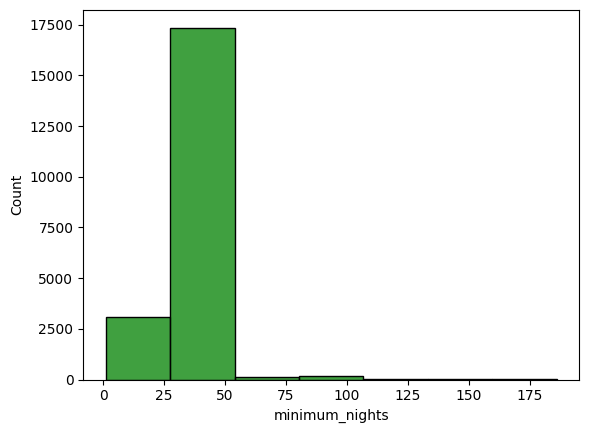

In [53]:
# looking to the graph
srn.histplot(df['minimum_nights'], color='green', bins=7)

In [54]:
df.groupby('rating').size()

rating
1.75            1
2.0             5
2.25            1
2.33            7
2.40            1
             ... 
4.98          166
4.99           47
5.0          2882
New           159
No rating    3593
Length: 162, dtype: int64

In [59]:
# replace 'No rating' to 0 and 'New' to 5
df.loc[df['rating'] == 'No rating', 'rating'] = 0
df.loc[df['rating'] == ' 5.0'] = 5.0
df.groupby('rating').size()

rating
0        3593
5.0      3041
1.75        1
2.0         5
2.25        1
         ... 
4.95      284
4.96      278
4.97      212
4.98      166
4.99       47
Length: 161, dtype: int64

In [60]:
df.groupby('rating').size()

rating
0        3593
5.0      3041
1.75        1
2.0         5
2.25        1
         ... 
4.95      284
4.96      278
4.97      212
4.98      166
4.99       47
Length: 161, dtype: int64

In [61]:
# round the rating elements
df.loc[:, 'rating'] = df['rating'].apply(lambda x: round(float(x)*2)/2)
df.groupby('rating').size()

<ipython-input-61-58697f426e20>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'rating'] = df['rating'].apply(lambda x: round(float(x)*2)/2)
<ipython-input-61-58697f426e20>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'rating'] = df['rating'].apply(lambda x: round(float(x)*2)/2)


rating
0.0     3593
2.0        7
2.5       14
3.0       53
3.5      173
4.0      795
4.5     5475
5.0    10648
dtype: int64

Text(0.5, 1.0, 'Quantity voted vs Rating')

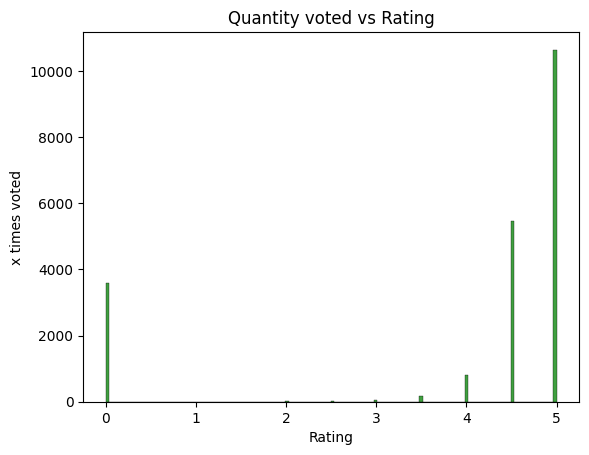

In [62]:
srn.histplot(df['rating'], color='green')
plt.xlabel('Rating')
plt.ylabel('x times voted')
plt.title('Quantity voted vs Rating')

In [63]:
# room_type
df.groupby('room_type').size()

room_type
5.0                2882
Entire home/apt    9766
Hotel room          103
Private room       7742
Shared room         265
dtype: int64

In [64]:
# % people give 5 stars when staying in 'Entire home/apt'
rooms = df.loc[df['room_type'] == 'Entire home/apt']
five_stars = len(rooms.loc[rooms['rating'] == 5])
perc = round(five_stars/len(rooms) * 100)
print(f'{perc}% people give 5 stars staying in Entire home/apt')

45% people give 5 stars staying in Entire home/apt


In [65]:
# bedrooms
df.groupby('bedrooms').size()

bedrooms
5.0        2882
1         11608
14            1
15            1
2          3038
3          1191
4           305
5            96
6            22
7             7
8             5
9             3
Studio     1599
dtype: int64

In [86]:
# converting float(5.0) to integer
df.loc[df['bedrooms'] == 5.0] = '5'
df.groupby('bedrooms').size()

bedrooms
1         11608
14            1
15            1
2          3038
3          1191
4           305
5          2978
6            22
7             7
8             5
9             3
Studio     1599
dtype: int64

<Axes: xlabel='bedrooms'>

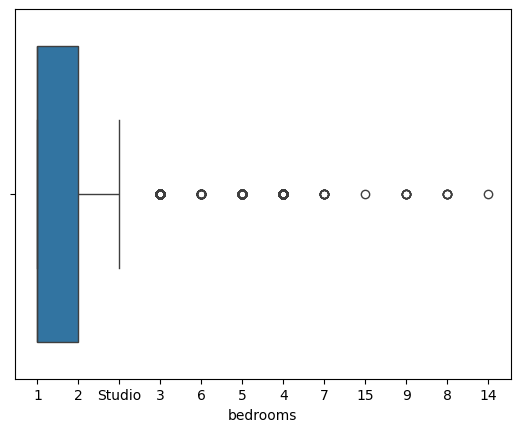

In [95]:
# boxplot graph
srn.boxplot(data=df['bedrooms'], orient='h')

In [ ]:
# let's consider that 'Studio' is a bedroom and convert that
df.loc[df['bedrooms'].str.strip() == 'Studio'] = 1
df.groupby('bedrooms').size()

bedrooms
1      1815
1     13439
14        1
15        1
2      3602
3      1394
4       345
5       112
6        29
7         9
8         5
9         6
dtype: int64

In [ ]:
# make sure all data are 'int'
df[['bedrooms']] = df[['bedrooms']].astype(int)

<ipython-input-264-caec28d87fdb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['bedrooms']] = df[['bedrooms']].astype(int)


Text(0, 0.5, 'N° Rooms')

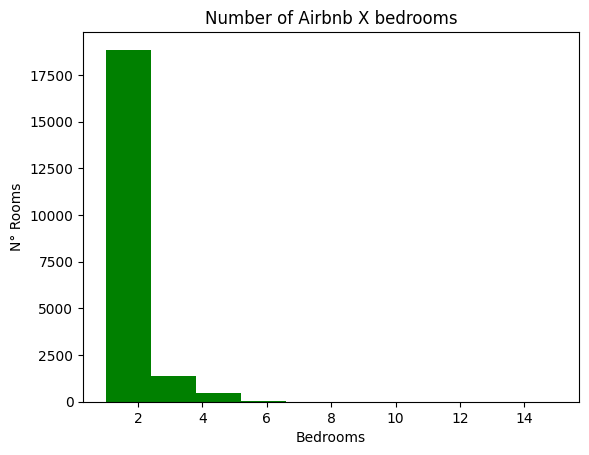

In [ ]:
# seeing on the graph
df.sort_values(by='bedrooms', ascending=True)
plt.hist(df['bedrooms'], color='green')
plt.title('Number of Airbnb X bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('N° Rooms')

In [ ]:
# price
df['price'].describe()

count     20758.000000
mean        173.955535
std        1021.014347
min           1.000000
25%          65.000000
50%         117.000000
75%         194.000000
max      100000.000000
Name: price, dtype: float64

In [ ]:
df.groupby('price').size()

price
1         1815
10           8
14           1
17           1
18           2
          ... 
7500         1
7590         1
9994         1
10000        5
100000       2
Length: 779, dtype: int64

In [69]:
# make sure all data are numbers
df['price'] = df['price'].astype(int)

<ipython-input-69-5e0773ba48d9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].astype(int)


In [72]:
# we saw 75% prices are over $ 194. let's consider prices below $200 and bigger than $50
df_filter = df[(df['price'] <= 200) & (df['price'] > 50)]
df_filter.sort_values(by='price', ascending=True, inplace=True)
df_filter

<ipython-input-72-329228b94b23>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter.sort_values(by='price', ascending=True, inplace=True)


,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,rating,bedrooms
11591,Queens,Jamaica,Entire home/apt,51,30.0,4.0,Studio
17903,Staten Island,New Brighton,Private room,51,30.0,4.5,1
6155,Brooklyn,Bushwick,Private room,51,30.0,5.0,1
4448,Manhattan,Midtown,Private room,51,1.0,4.5,1
1823,Brooklyn,Park Slope,Private room,51,30.0,4.5,1
...,...,...,...,...,...,...,...
1412,Bronx,Kingsbridge,Private room,200,30.0,0.0,1
5272,Queens,Arverne,Entire home/apt,200,30.0,5.0,3
15578,Queens,Sunnyside,Entire home/apt,200,30.0,4.5,2
15038,Manhattan,Upper West Side,Private room,200,30.0,4.5,1


<Axes: xlabel='price', ylabel='Count'>

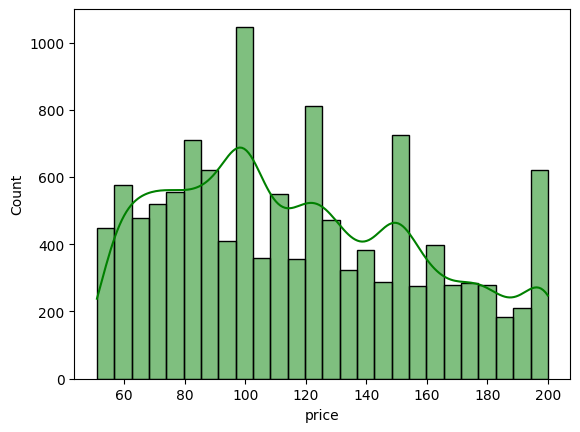

In [73]:
srn.histplot(df_filter['price'], color='green', kde=True)

Text(0.5, 1.0, 'Rating vs Pricing')

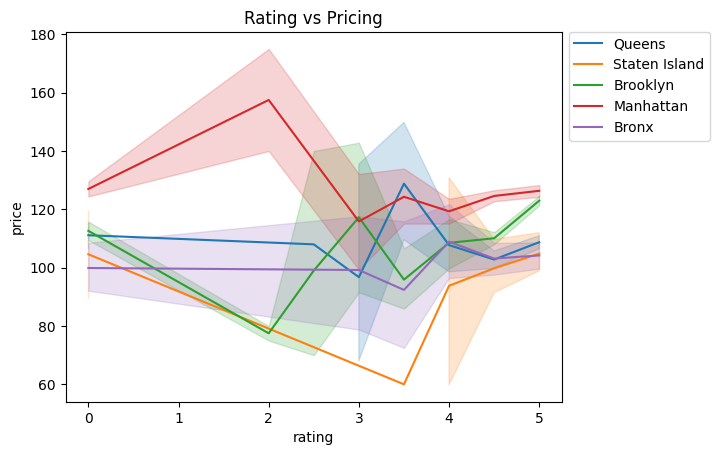

In [76]:
# Rating vs Pricing
srn.lineplot(x='rating', y='price', hue='neighbourhood_group', data=df_filter)
plt.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.title('Rating vs Pricing')

In [ ]:
# So if you are looking for a low cost airbnb in NY, with good rating, Staten Island can be good idea